## Observations and Insights

## Dependencies and starter code

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Store the csv file paths
mouse_metadata = "Resources/Mouse_metadata.csv"
study_results = "Resources/Study_results.csv"

# Create dataframes from the mouse data and the study results from the csv files
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = study_results.merge(mouse_metadata, on='Mouse ID', how='left')

## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Group the data by drug regimen
drug_groups = combined_data.groupby('Drug Regimen')

#Store the tumor volume column as a variable
tumor_volume = drug_groups['Tumor Volume (mm3)']

#Calculate the mean tumor volume for each drug treatment
tumor_vol_mean = tumor_volume.mean()
tumor_vol_mean

#Calculate the median tumor volume for each drug treatment
tumor_vol_median = tumor_volume.median()
tumor_vol_median

#Calculate the variance in tumor volume for each drug treatment
tumor_vol_var = tumor_volume.var(ddof=0)
tumor_vol_var

#Calculate the standard devation for tumor volume for each treatment
tumor_vol_stdev = tumor_volume.std(ddof=0)
tumor_vol_stdev

#Calculate the standard error of the mean for tumor volume for each treatment
tumor_vol_sem = tumor_volume.sem(ddof=0)
tumor_vol_sem

summary_stat_table = pd.DataFrame({
    'Mean Tumor Volume': tumor_vol_mean,
    'Median Tumor Volume': tumor_vol_median,
    'Variance': tumor_vol_var,
    'Standard Deviation': tumor_vol_stdev,
    'Standard Error of the Mean': tumor_vol_sem
})
summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.322552,50.854632,42.088020,6.487528,0.511289
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


## Bar plots

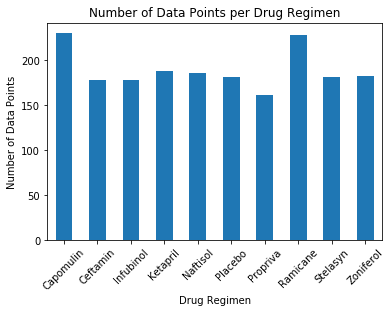

In [5]:
#Count the number of data points for each drug treatment
treatment_data_points = drug_groups['Tumor Volume (mm3)'].count()

# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_chart_pandas = treatment_data_points.plot(kind='bar', rot=45)

#Add axis labels and chart title
bar_chart_pandas.set_ylabel('Number of Data Points')
bar_chart_pandas.set_title('Number of Data Points per Drug Regimen')

#Display the bar chart
plt.show()

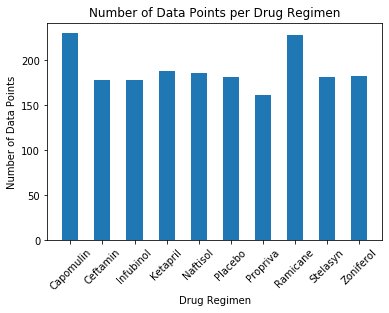

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Store the values to use for the x-axis
x_axis = np.arange(0, len(treatment_data_points))

#Generate the bar chart
plt.bar(x_axis, treatment_data_points, width=.5)

#Create a sorted list of drug regimens
regimen_list = [value for value in combined_data['Drug Regimen'].sort_values().unique()]

#Assign each drug regimen to a tick mark on the x-axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_list, rotation=45)

#Creae axis labels and a chart title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Regimen')

#Display the bar chart
plt.show()

## Pie plots

## Quartiles, outliers and boxplots

In [35]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Group the data by mouse ID
grouped_data = combined_data.groupby(['Mouse ID'])
#take the max values from the grouped data to determine final timepoints. Reset the index
final_timepoint = grouped_data.max().reset_index()

#Merge the final timepoint dataframe with the combined dataset
merged_df = pd.merge(final_timepoint, combined_data, how='left', on=['Mouse ID', 'Timepoint'])

#New dataframe with only the relevant columns
tumor_volume = merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)_y', 'Drug Regimen_x']]

#Give the columns cleaner names
final_tumor_volumes = tumor_volume.rename(columns={
    'Tumor Volume (mm3)_y': 'Tumor Volume',
    'Drug Regimen_x': 'Drug Regimen'
})

#Dataframe of final tumor volume for drug regimen Capomulin
capo_df = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == 'Capomulin']
#Store the column for tumor volume
capo_volume_final = capo_df['Tumor Volume']

# #Dataframe of final tumor volume for drug regimen Ramicane
rami_df = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == 'Ramicane']
#Store the column for tumor volume
rami_volume_final = rami_df['Tumor Volume']

#Dataframe of final tumor volume for drug regimen Infubinol
infu_df = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == 'Infubinol']
#Store the column for tumor volume
infu_volume_final = infu_df['Tumor Volume']

#Dataframe of final tumor volume for drug regimen Ceftamin
ceft_df = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == 'Ceftamin']
#Store the column for tumor volume
ceft_volume_final = ceft_df['Tumor Volume']

In [36]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Calculate quartiles and IQR for Capomulin regimen
capo_quartiles = capo_volume_final.quantile([.25, .5, .75])
capo_lowerq = capo_quartiles[.25]
capo_upperq = capo_quartiles[.75]
capo_iqr = capo_upperq - capo_lowerq
capo_iqr
#Calculate upper and lower bounds
capo_lower_bound = capo_lowerq - (1.5*capo_iqr)
capo_upper_bound = capo_upperq + (1.5*capo_iqr)

#Calculate quartiles and IQR for Ramicane regimen
rami_quartiles = rami_volume_final.quantile([.25, .5, .75])
rami_lowerq = rami_quartiles[.25]
rami_upperq = rami_quartiles[.75]
rami_iqr = rami_upperq - rami_lowerq
rami_iqr
#Calculate upper and lower bounds
rami_lower_bound = rami_lowerq - (1.5*rami_iqr)
rami_upper_bound = rami_upperq + (1.5*rami_iqr)

#Calculate quartiles and IQR for Infubinol regimen
infu_quartiles = infu_volume_final.quantile([.25, .5, .75])
infu_lowerq = infu_quartiles[.25]
infu_upperq = infu_quartiles[.75]
infu_iqr = infu_upperq - infu_lowerq
infu_iqr
#Calculate upper and lower bounds
infu_lower_bound = infu_lowerq - (1.5*infu_iqr)
infu_upper_bound = infu_upperq + (1.5*infu_iqr)

#Calculate quartiles and IQR for Ceftamin regimen
ceft_quartiles = ceft_volume_final.quantile([.25, .5, .75])
ceft_lowerq = ceft_quartiles[.25]
ceft_upperq = ceft_quartiles[.75]
ceft_iqr = ceft_upperq - ceft_lowerq
ceft_iqr
#Calculate upper and lower bounds
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

print(f"For Capomulin values below {capo_lower_bound} or above {capo_upper_bound} could be outliers.")
print(f"For Ramicane values below {rami_lower_bound} or above {rami_upper_bound} could be outliers.")
print(f"For Infubinol values below {infu_lower_bound} or above {infu_upper_bound} could be outliers.")
print(f"For Ceftamin values below {ceft_lower_bound} or above {ceft_upper_bound} could be outliers.")

For Capomulin values below 20.70456164999999 or above 51.83201549 could be outliers.
For Ramicane values below 17.912664470000003 or above 54.30681135 could be outliers.
For Infubinol values below 36.83290494999999 or above 82.74144559000001 could be outliers.
For Ceftamin values below 25.355449580000002 or above 87.66645829999999 could be outliers.


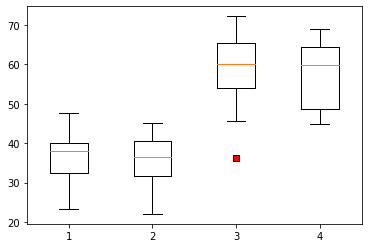

In [42]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Set outlier format to be a red square
outliers = dict(markerfacecolor='r', marker='s')

#Create a boxplot of the final tumor volumes for Capomulin, Ramicane, Infubinol and Ceftamin
plt.boxplot([capo_volume_final, rami_volume_final, infu_volume_final, ceft_volume_final], flierprops=outliers)

plt.show()

## Line and scatter plots

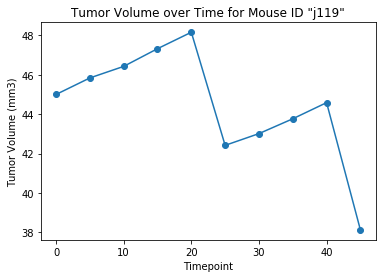

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#New data frame of all rows for the drug regimen Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen']=='Capomulin']
# capomulin_data

#New data frame of all rows for the mouse with ID 'j119'
single_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']=='j119']
# single_mouse_data

single_tumor_volume = single_mouse_data['Tumor Volume (mm3)']
# single_tumor_volume

single_tumor_time = single_mouse_data['Timepoint']
# single_tumor_time

#Line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(single_tumor_time, single_tumor_volume, marker='o')

#Add chart labels
plt.title('Tumor Volume over Time for Mouse ID "j119"')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

#Display the chart
plt.show()

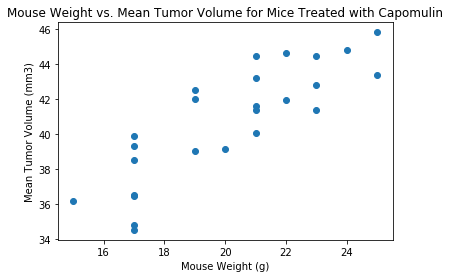

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#New data frame of all rows for the drug regimen Capomulin
capomulin_data = combined_data.loc[combined_data['Drug Regimen']=='Capomulin']

#Group by mouse ID
capo_grouped = capomulin_data.groupby('Mouse ID')
#Calculate mean tumor volume for each mouse
capo_grouped_mean_volume = capo_grouped['Tumor Volume (mm3)'].mean()

#Reset the index
new_index = capo_grouped_mean_volume.reset_index()

#New daataframe with mouse ID and weight
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']]

#Merge the two dataframes
merged = new_index.merge(mouse_weights, on='Mouse ID', how='left', copy=False)
#Drop duplicate values for each mouse
merged_unique = merged.drop_duplicates(keep='first')

#Create a scatter plot of mouse weight vs. tumor volume
plt.scatter(merged_unique['Weight (g)'], merged_unique['Tumor Volume (mm3)'])

#Add chart labels
plt.title('Mouse Weight vs. Mean Tumor Volume for Mice Treated with Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')

#Display the chart
plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The r-squared is: 0.8419363424694718


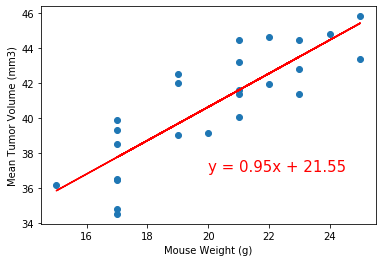

In [15]:
# Print out the r-squared value along with the plot.
x_values = merged_unique['Weight (g)']
y_values = merged_unique['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue}")
plt.show()